# Sample

This sample shows how the lightroot project works. Note important settings are confined to a settings file so that we try
to make the slow batch jobs parameterless. The method names should be self-explantory - we sharpen images, pluck centroids and show a sample of the overlay. This process is carried out in batch to create a dataframe of blobs which is saved to txt files in the cached data folder. Having extracted centroids for all frames, the tracker builds the identities and writes the result to the cached data folder

In [1]:
%matplotlib inline
import lightroot

08/02/2018 21:53:16 INFO:loaded lightroot


# 1 Manually set file templates for processing

In [2]:
pth  ="C:/Users/mrsir/Box Sync/uncut/Images/310717/"
lightroot.SETTINGS["stack_files"] = pth+"Run0140_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0140_tp{}_MIP.tif"

# 2 Loading frames

In [ ]:
sample_time_frame =4
stack = lightroot.io.get_stack(sample_time_frame)
lightroot.io.plotimg(stack)
#max_int = lightroot.io.get_max_int(sample_time_frame)
#lightroot.io.plotimg(max_int)
#lightroot.io.stats(stack, ylim=(0,86832150), xlim=(0,0.1), normed_hist=False)

# 3 Full frame detection routine

In [ ]:
blob_centroids,stack = lightroot.blobs.detect(stack,  display_detections=True) #sharpen_iter=2, isolate_iter=2,
lightroot.io.overlay_blobs(stack,blob_centroids)

# 4 Running batch process

In [ ]:
lightroot.process("C:/Users/mrsir/Box Sync/uncut/images/083117/149/", log_to_file=False)

# 5 Low-level steps

## isolating roots via lowband

### 2d

08/02/2018 21:53:21 INFO(0):Stack loaded from C:/Users/mrsir/Box Sync/uncut/Images/310717/Run0140_tp000.tif
08/02/2018 21:53:21 INFO(0):using low band range for 2d data from 95,99, 50 data percentile [0.33200000000000002, 0.40100000000000002, 0.17199999999999999]
08/02/2018 21:53:22 INFO(0):projecting 2d mask to 3d mask...
08/02/2018 21:53:22 INFO(0):using low band range 3d data from 95,99, 50 data percentile [0.23000000000000001, 0.29899999999999999, 0.14399999999999999]
08/02/2018 21:53:22 INFO(0):checking shine @ 32113.00
08/02/2018 21:53:22 WARN(0):bright frame detected. removing bottom
08/02/2018 21:53:22 INFO(0):extracted root region with volume 11080200 with non-zero 0.29%


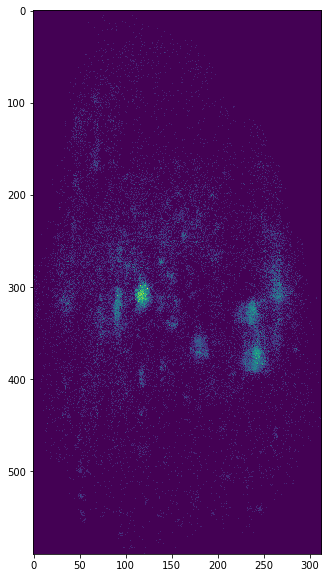

In [3]:
stack = lightroot.io.get_stack(0)
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack,final_filter=.35)
lightroot.io.plotimg(stack)

### 3d

In [4]:
# stack= lightroot.blobs.low_pass_root_segmentation(stack)
# lightroot.io.plotimg(stack_sample)

## sharpening root region

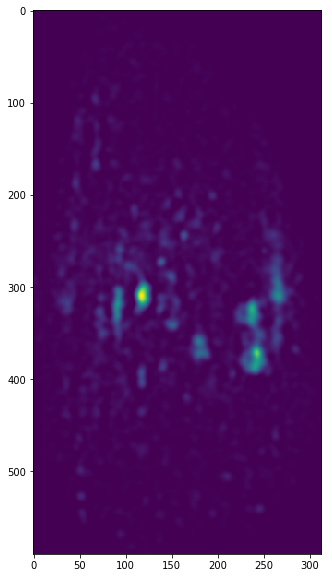

In [5]:
stack = lightroot.blobs.sharpen(stack)
lightroot.io.plotimg(stack)

## isolating blobs in data

08/02/2018 21:53:26 INFO(0):sharpening done. percentage non-zero is 12.56%


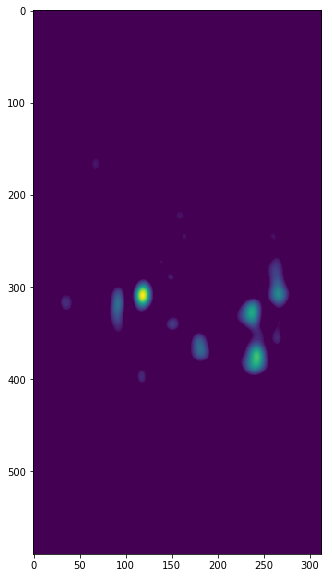

In [6]:
stack = lightroot.blobs.isolate(stack)
ax = lightroot.io.plotimg(stack)

## marking centroids

08/02/2018 21:53:29 INFO(0):adding big region because no little region found - note the vol of this item is 2156 and its ecc is 0.4042247695740261
08/02/2018 21:53:29 INFO(0):adding big region because no little region found - note the vol of this item is 21504 and its ecc is 0.9284743734149482
08/02/2018 21:53:29 INFO(0):adding big region because no little region found - note the vol of this item is 1215 and its ecc is 0.8145054627197132
08/02/2018 21:53:29 INFO(0):adding big region because no little region found - note the vol of this item is 2000 and its ecc is 0.9127071514222678
08/02/2018 21:53:29 INFO(0):adding big region because no little region found - note the vol of this item is 1728 and its ecc is 0.6620979638256596
08/02/2018 21:53:29 INFO(0):Found 10 centroids


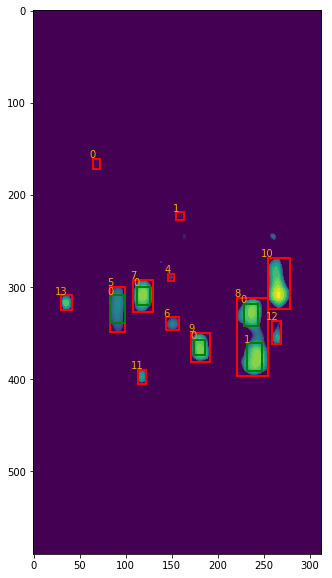

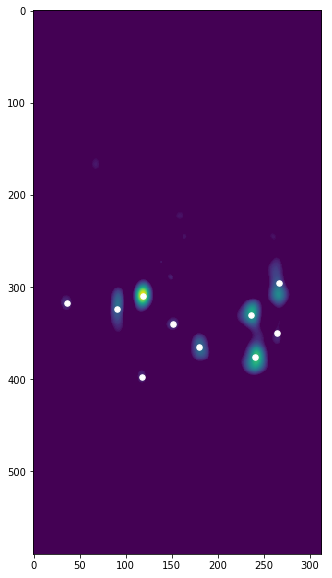

In [7]:
blobs_centroids = lightroot.blobs.blob_centroids(stack, display=True, max_final_ecc=0.95,min_final_volume=1000, underlying_image=stack)
lightroot.io.overlay_blobs(stack,blobs_centroids)